## Problem 1

Does put-call parity apply for European options?

Yes, put-call parity applies to European options.

Put call parity says that if you have a put and call option with the same expiration date and strike price, as well as zero-coupon bond with the same face value and maturity as the options,

Call Price - Put Price = Stock Price - Bond Price

or alternatively

$C - P = S- Ke^{-rT}$
where $r$ is the interest rate, $T$ is the time to maturity, $K$ is the strike price, $C$ is the call price, $S$ is the current stock price, and $P$ is the put price.


This is true because of a no-arbitrage assumption.

If the call-price minus the put price exceeds the stock price minus the bond price, then we can buy the put and the stock, and sell the call and the bond.  Our profit will be the difference.  If at expiration, the stock price exceeds the strike price, our stock is called away and we pay off the bond.  If the stock price is less than the strike price, we can exercise our put and pay off the bond.  In either case we have no more net payments after our initial trade, so we have a no-risk profit.


Similarly, if the call price minus the put price is less than the stock price minus the bond price, then we can buy the call and the bond, and sell the put and the stock.  Our profit will be the difference.  If at expiration, the stock price exceeds the strike price, we can exercise the call in order to buy back our short stock.  IF at expiration the stock price is less than the strike price, the put is exercised against us, and we use the payment from the mature bond to buy back the stock. In either case, we make a riskless profit.
 
## Problem 2

If we want the price of the call, we get

Call Price = Stock Price + Put Price - Bond Price 

## Problem 3

 If we want the price of the put, we get

Put Price = Call Price + Bond Price - Put Price

## Problem 4
 Put-call parity does not apply to American options because they can be exercised before the expiry date.

The most we can say is that 

$S - K \leq C - P \leq S - K e^{-rT}$
where $r$ is the interest rate, $T$ is the time to maturity, $K$ is the strike price, $C$ is the call price, $S$ is the current stock price, and $P$ is the put price. Hence $K e^{-rT}$ is the current price of the bond.

If either inequality is violated, we would have an arbitrage opportunity even if the options are exercised early against us, but if the difference $C - P$ remains within a certain range, there is no arbitrage opportunity.

If the interest rate is zero, then the value of $C - P$ is determined exactly.





In [ ]:
import numpy as np
def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

In [ ]:
import numpy as np
def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    P = np.zeros([N + 1, N + 1])  # put prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        P[N, i] = max(-S_ini * (u ** (i)) * (d ** (N - i)) + K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return P[0, 0], P, S, Delta

In [ ]:
call_price, call_prices, stock_prices, delta_call = call_option_delta(S_ini = 100, K = 100, T = 0.25, r=0.05, sigma=0.20, N=180)
put_price, put_prices, stock_prices_p, delta_put = put_option_delta(S_ini = 100, K = 100, T = 0.25, r=0.05, sigma=0.20, N=180)

## Problem 5

Volatility | Call price | Put price
-----------|-----------|-----------
20% | 4.61 | 3.37
25% | 5.59 | 4.35

In [ ]:
print (f"The price of an ATM European call is {call_price:.2f}")
print(f"The price of an ATM European put is {put_price:.2f}")

The price of an ATM European call is 4.61
The price of an ATM European put is 3.37


To price an ATM European call and put using a binomial tree, we create a binomial tree with the appropriate number of steps.  First, we compute the price of the stock at each level of the tree.  To do this, we use the given value of $\sigma$ to compute up and down values at each time step, so that the overall volatility will be the same as $\sigma$.

To do this we put $u = e^{\sigma \sqrt{dt}}, d = e^{-\sigma \sqrt{dt}}$.

Then we compute the risk neutral probabilities for a price increase or decrease.
This means that the current price of the stock is fair; that is, if we calculate the expected value of the stock at the next time step, the current stock price is the discounted version of the expected value; hence a risk-neutral investor will receive the same expected return whether he purchases a risk-free bond or the stock.

Once we have these probabilities, we can compute the value of the actual stock for every combination of ups and downs. 

Once we have computed this, we can compute the payoffs for the call and put options.  We start by computing the payoff at expiration.  If the stock price is above the strike price, the payoff for the put is 0, and the payoff for the call is the difference in prices.  Similarly, if the stock price is below the strike price, the payoff for the call is 0, and the payoff for the put is the difference in prices.  Then we compute the prices for the call and put options at earlier time steps.  At these earlier time steps, the payoff for the call and put options is the discounted value of the conditional expected value of the payoff at the next time step; that is, we look at where we are on the binomial tree, take a weighted average of the prices and the next time step if the stock goes up or down, and then discount it at the risk-free interest rate.


We used 180 time steps because there are about 90 days in three months, so this valuation will use two time steps for each day.


In [ ]:
delta_call

array([[0.56936543, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53957054, 0.59839308, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5093819 , 0.56898181, 0.62704698, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
delta_put

array([[-0.43063457,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.46042946, -0.40160692,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.4906181 , -0.43101819, -0.37295302, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.        , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ]])

## Problem 6

In [ ]:
print(f"The delta for the call option is {delta_call[0][0]:.2f}.  The delta for the put option is {delta_put[0][0]:.2f}")

The delta for the call option is 0.57.  The delta for the put option is -0.43


The delta for the call option is positive, while the delta for the put option is negative.  Their absolute values sum to 1 (0.57 + 0.43 = 1)

The delta of an option measures the sensitivity of its price to changes in the underlying asset's price. 

European Call Option: The delta of a European call option ranges from 0 to 1. At the money, where the strike price is equal to the current price of the underlying asset, the delta of a call option is approximately 0.5.  Here, the delta is slightly above 0.50 because the stock price incorporates a discount factor, so if the price is 100 now, we should expect the price to be above 100 in the future for the stock to be fairly valued. A positive delta implies that the call option's price tends to increase when the underlying asset's price rises.

European Put Option: The delta of a European put option ranges from -1 to 0. At the money, the delta of a put option is approximately -0.5. Here, the delta is slightly below -0.50 because the stock price incorporates a discount factor. A negative delta indicates that the put option's price tends to increase when the underlying asset's price decreases.

The delta serves as a proxy for the option's hedge ratio or the sensitivity of the option's value to changes in the underlying asset. When computing the delta, we can figure out how many shares we should hold to have the same sensitivity to changes in the asset price. The delta for the call also approximates the probability that the call option expires in the money, since if the stock will be in the money no matter what happens, then the payoff for the call will increase in step with the stock, while if the call will always be out of the money, then the call option will always be worth 0, so the delta will be 0.

Obtaining a positive delta for a call option and a negative delta for a put option makes sense due to the relationship between the options and the underlying asset. When the underlying asset's price rises, call options become more valuable, resulting in a positive delta. Conversely, put options gain value when the underlying asset's price decreases, leading to a negative delta. 



## Problem 7

In [ ]:
call_price, call_prices, stock_prices, delta_call = call_option_delta(S_ini = 100, K = 100, T = 0.25, r=0.05, sigma=0.25, N=180)


In [ ]:
put_price, put_prices, stock_prices_p, delta_put = put_option_delta(S_ini = 100, K = 100, T = 0.25, r=0.05, sigma=0.25, N=180)

In [ ]:
print(f"If we increase volatility to 25%, then the delta for the call option is {delta_call[0][0]:.2f}.  The delta for the put option is {delta_put[0][0]:.2f}")

If we increase volatility to 25%, then the delta for the call option is 0.56.  The delta for the put option is -0.44


In [ ]:
print (f"If we increase volatility to 25%, the price of an ATM European call is {call_price:.2f}")
print(f"If we increase volatility to 25%, the price of an ATM European put is {put_price:.2f}")

If we increase volatility to 25%, the price of an ATM European call is 5.59
If we increase volatility to 25%, the price of an ATM European put is 4.35


Both put and call options will increase in value with increased volatility.

If we divide the difference in the prices by the 5 percentage point difference in volatility, we get 0.196 for both the put and call; that is, based on these two data points, the price goes up about 20 cents for each percentage point increase in volatility. The absolute difference is the same because of put-call parity; difference between the put price and the call price depends on the interest rate, not the volatility of the stock, so there should be the same increase in both prices.

Increased volatility raises the chances of the underlying asset's price falling below the strike price by expiration. With increased volatility, the likelihood of the underlying asset's price rising above the strike price by the expiration date increases.  This would increase the payoff at expiration.  The volatility also increases the probability of being deeply out of the money for the put and the call, but this does not affect the price because the payoff is still zero. The nonlinearity rewards upside volatility, but does not penalize downward volatility.

The put was initially cheaper, so the same absolute price change caused a greater percentage change in price for the call.  An at the money put is cheaper than the call because of the discount factor; if the stock is at 100 now, we should expect the stock price to be greater than 100 in the future.


In [ ]:
def american_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

## Problem 8

Volatility | Call Price | Put Price
-----------| ---------- | ---------
 20%|4.61|3.48
 20%|5.59|4.46

In [ ]:
(acp, ac_payoff, ast, ac_delta) = american_option(100,100,0.25,0.05, 0.20, 180, "C")

In [ ]:
print(f"The price of the American call option in {acp:0.2f}")

The price of the American call option in 4.61


In [ ]:
(app, ap_payoff, ast, ap_delta) = american_option(100,100,0.25,0.05, 0.20, 180, "P")

In [ ]:
print(f"The price of the American put option in {app:0.2f}")

The price of the American put option in 3.48


To compute the price of the American call and put options, we simulate the price going up and down using a binomial tree.  The only difference is in calculating the payoff and prices of the option.  To compute the price of the option, we can either exercise the option early, or wait and get the later payoff.  So we should take the maximum of the payoff from early exercise, or the discounted expected payoff from later exercise.

In [ ]:
print(f"The delta for the American call option is {ac_delta[0][0]:0.2f}.  The delta for the American put option is {ap_delta[0][0]:0.2f}")

The delta for the American call option is 0.57.  The delta for the American put option is -0.45


Since the option is at the money, both values of delta should be nearly 0.50.  The delta still represents the amount of stock that you would need to hold to hedge a position, but this delta is only valid for one time step because of the possibility of early exercise.  The deltas add up to 1.02 instead of 1.00 because a long call together with a short put do not necessarily move like the stock, because the put might be exercised early against us.

The delta of an option measures the sensitivity of its price to changes in the underlying asset's price. 

Obtaining a positive delta for a call option and a negative delta for a put option makes sense due to the relationship between the options and the underlying asset. When the underlying asset's price rises, call options become more valuable, resulting in a positive delta. Conversely, put options gain value when the underlying asset's price decreases, leading to a negative delta. 


## Problem 10

In [ ]:
(acp, ac_payoff, ast, ac_delta) = american_option(100,100,0.25,0.05, 0.25, 180, "C")

In [ ]:
print(f"The price of the American call option with volatility 25% is {acp:0.2f}")

The price of the American call option with volatility 25% is 5.59


In [ ]:
(app, ap_payoff, ast, ap_delta) = american_option(100,100,0.25,0.05, 0.25, 180, "P")

In [ ]:
print(f"The price of the American put option with volatility 25% is {app:0.2f}")

The price of the American put option with volatility 25% is 4.46


The prices of the American call and put option increased in absolute value by the same amount (98 cents); based on these two data points, we have a 20 cent increase in the price of both options for every 1 percentage point increase in the volatility.

The put option has a greater relative return because the price was lower to begin with.

## Problem 11

In [ ]:
bond_price = 100 * np.exp(-0.05 * 0.25)

In [ ]:
print(f"The market price of a zero-coupon bond with maturity in 3 months and face value 100 is {bond_price:.2f}")

The market price of a zero-coupon bond with maturity in 3 months and face value 100 is 98.76


In [ ]:
print(f"For volatility 25%, the total of the call price and the bond price is {call_price + bond_price : .2f}")

For volatility 25%, the total of the call price and the bond price is  104.35


In [ ]:
print(f"For volatility 25%, the total of the put price and the stock price price is {put_price + 100 : .2f}")

For volatility 25%, the total of the put price and the stock price price is  104.35


In [ ]:
print(f"For volatility 20%, the total of the call price and the bond price is {call_price + bond_price : .2f}")

For volatility 20%, the total of the call price and the bond price is  103.37


In [ ]:
print(f"For volatility 20%, the total of the put price and the stock price price is {put_price + 100 : .2f}")

For volatility 20%, the total of the put price and the stock price price is  103.37


For both the 20% and 25% volatility levels, we have put-call parity for the European call option.  One way to see this is that if we buy a call and sell a put, we get a position with delta one, but with the payoff shifted so that at expiry the payoff will be zero if the stock price is at the money.  This is also true if we buy the stock and sell a bond.  Since the two portfolios will move identically as the stock moves up and down, and will have the same value at expiration, they should have the same value today as well. 

## Problem 12

We do not have put-call parity for the American call and put.  At the 20% level of volatility, the call price plus the bond price is 103.37 while the put price plus the put price is 103.48; there is a difference of about 10 cents because of the possibility of early exercise.

Similarly, at the 20% level of volatility, the call price plus the bond price is 

In [ ]:
print(f"Call price plus bond price = {acp + bond_price:0.2f}")

Call price plus bond price = 103.37


In [ ]:
print(f"Put price plus stock price = {app + 100:0.2f}")

Put price plus stock price = 103.48


## Problem 13

The European call costs 4.61 while the American call also costs 4.61

It is never optimal to exercise an American call option early, so we end up computing the same calculations when working through the binomial tree.  Hence this should always be the case for a stock with no dividends.

## Problem 14

The European put option costs 3.37 while the American put option costs 3.48

The American put option costs more because it can be exercised early.  It is sometimes optimal to exercise the American put option early, so we sometimes take the early exercise branch when calculating the prices in the binomial tree.  So it should be the case that the American put option costs strictly more than the European put option if we use enough time steps, as there is the possibility that the option becomes far enough in the money that early exercise is optimal.

## Problem 15

In [ ]:
import numpy as np

In [ ]:
class TrinomialModel(object):  # Here we start defining our 'class' --> Trinomial Model!
    # First, a method to initialize our `TrinomialModel` algorithm!
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

    # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

    # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

    # Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0

        return res

    # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError()

    # Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = tmp

        return self.__discount * expectation

    # Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]

In [ ]:
class TrinomialCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCall, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

In [ ]:
print("Strike\tPrice of European call option")
print("--------------------")
for strike in (90, 95, 100, 105, 110):
    tree = TrinomialCall(100.0, 0.05, 0.20, 0.25, strike)
    call_price = tree.price(180)
    print(f"{strike}\t{call_price:0.2f}")

Strike	Price of European call option
--------------------
90	11.67
95	7.71
100	4.61
105	2.48
110	1.19


We observe that the price of the call option increases as it gets deeper in the money, and decreases as it becomes further out of the money; hence it is decreasing with respect to the strike price; this makes sense because an in the money call option is worth more because it has intrinsic value immediately, while an out of the money call option only has value because it can potentially become in the money later.

Strike|Price of European call option
------|-------------
90 |	11.67
95	| 7.71
100	| 4.61
105	| 2.48
110	| 1.19

## Problem 16

In [ ]:
class TrinomialPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPut, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

In [ ]:
print("Strike\tPrice of European put option")
print("--------------------")
for strike in (90, 95, 100, 105, 110):
    tree = TrinomialPut(100, 0.05, 0.20, 0.25, strike)
    p_price = tree.price(180)
    print(f"{strike}\t{p_price:0.2f}")

Strike	Price of European put option
--------------------
90	0.55
95	1.53
100	3.37
105	6.18
110	9.82


We observe that the price of the put option increases as it gets deeper in the money, and decreases as it becomes further out of the money; hence it is **increasing with respect to the strike price** (e.g. a put with strike price of 110 is in the money, so is worth more than a put with strike price 100); this makes sense because an in the money put option is worth more because it has intrinsic value immediately, while an out of the money put option only has value because it can potentially become in the money later if the stock falls.

Strike	| Price of European put option
--------|------------
90	| 0.55
95	| 1.53
100	| 3.37
105	| 6.18
110	| 9.82

## Problem 17

In [ ]:
class TrinomialModelAmerican(object):  # Here we start defining our 'class' --> Trinomial Model!
    # First, a method to initialize our `TrinomialModel` algorithm!
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

    # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

    # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

    # Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0

        return res

    # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError()

    # Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        early_exercise_payoff = self.payoff(crt_vec_stock)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = tmp

        return np.maximum(self.__discount * expectation, early_exercise_payoff)

    # Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]

class TrinomialCallAmerican(TrinomialModelAmerican):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialCallAmerican, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

In [ ]:
print("Strike\tPrice of American call option")
print("--------------------")
for strike in (90, 95, 100, 105, 110):
    tree = TrinomialCallAmerican(100, 0.05, 0.20, 0.25, strike)
    call_price = tree.price(180)
    print(f"{strike}\t{call_price:0.2f}")

Strike	Price of American call option
--------------------
90	11.67
95	7.71
100	4.61
105	2.48
110	1.19


We can see that as the American call option becomes more in the money, the price increase.  The American call option's price is decreasing with respect to the strike price since lower prices are more in the money. This is what we would expect, because we have intrisic value in the American call option if it is in the money; moreover, if the strike price is higher, it is less likely that the stock will rise above that strike price.


Strike |	Price of American call option
------|--------------
90	| 11.67
95	| 7.71
100	| 4.61
105	| 2.48
110	| 1.19

## Problem 18

In [ ]:
class TrinomialPutAmerican(TrinomialModelAmerican):
    def __init__(self, S0, r, sigma, mat, K):
        super(TrinomialPutAmerican, self).__init__(S0, r, sigma, mat)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)

In [ ]:
print("Strike\tPrice of American put option")
print("--------------------")
for strike in (90, 95, 100, 105, 110):
    tree = TrinomialPutAmerican(100, 0.05, 0.20, 0.25, strike)
    p_price = tree.price(180)
    print(f"{strike}\t{p_price:0.2f}")

Strike	Price of American put option
--------------------
90	0.56
95	1.57
100	3.48
105	6.42
110	10.33


We can see that as the American put option becomes more in the money (i.e. the strike price goes above the stock price), the price increase.  The American put option's price is increasing with respect to the strike price since lower prices are more in the money. This is what we would expect since if the strike price is above the stock price we have intrinsic value from early exercise.

Strike	| Price of American put option
--------|------------
90	| 0.56
95	| 1.57
100	| 3.48
105	| 6.42
110	| 10.33

## Problem 19

Text(0.5, 1.0, 'Price of European call option (strike = 100) at various stock prices')

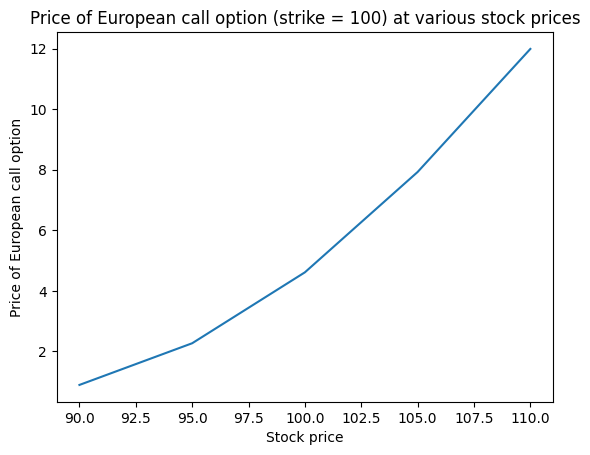

In [ ]:
stock_prices = (90, 95, 100, 105, 110)
cprices = []
for st_price in stock_prices:
   tree = TrinomialCall(st_price, 0.05, 0.20, 0.25, 100)
   c_price = tree.price(180)
   cprices.append(c_price)
import matplotlib.pyplot as plt
plt.plot(stock_prices, cprices)
plt.xlabel("Stock price")
plt.ylabel("Price of European call option")
plt.title("Price of European call option (strike = 100) at various stock prices")

Text(0.5, 1.0, 'Price of European put option (strike = 100) at various stock prices')

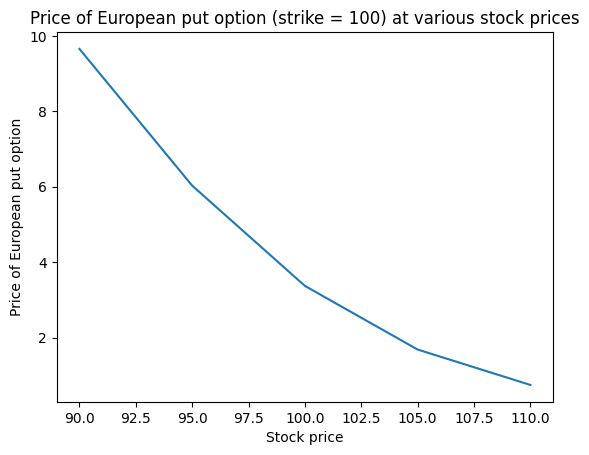

In [ ]:
stock_prices = (90, 95, 100, 105, 110)
pprices = []
for st_price in stock_prices:
   tree = TrinomialPut(st_price, 0.05, 0.20, 0.25, 100)
   p_price = tree.price(180)
   pprices.append(p_price)
import matplotlib.pyplot as plt
plt.plot(stock_prices, pprices)
plt.xlabel("Stock price")
plt.ylabel("Price of European put option")
plt.title("Price of European put option (strike = 100) at various stock prices")

## Problem 20

Text(0.5, 1.0, 'Price of American call option (strike = 100) at various stock prices')

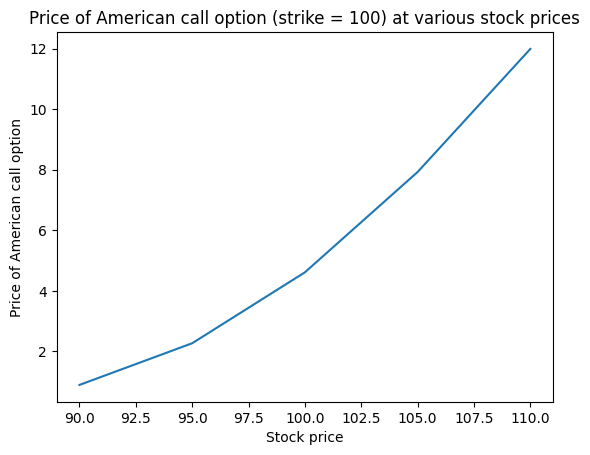

In [ ]:
stock_prices = (90, 95, 100, 105, 110)
cprices = []
for st_price in stock_prices:
   tree = TrinomialCallAmerican(st_price, 0.05, 0.20, 0.25, 100)
   c_price = tree.price(180)
   cprices.append(c_price)
plt.plot(stock_prices, cprices)
plt.xlabel("Stock price")
plt.ylabel("Price of American call option")
plt.title("Price of American call option (strike = 100) at various stock prices")

Text(0.5, 1.0, 'Price of American put option (strike = 100) at various stock prices')

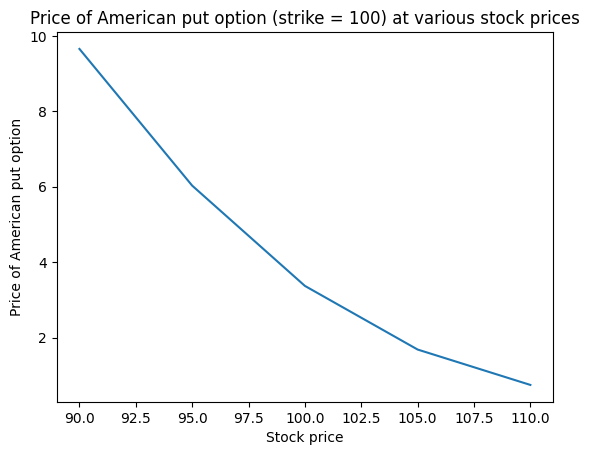

In [ ]:
stock_prices = (90, 95, 100, 105, 110)
pprices = []
for st_price in stock_prices:
   tree = TrinomialPut(st_price, 0.05, 0.20, 0.25, 100)
   p_price = tree.price(180)
   pprices.append(p_price)
plt.plot(stock_prices, pprices)
plt.xlabel("Stock price")
plt.ylabel("Price of American put option")
plt.title("Price of American put option (strike = 100) at various stock prices")

## Problem 21

In [ ]:

strikes = (90, 95, 100, 105, 110)
call_prices = []
for strike in strikes:
  tree = TrinomialCall(100, 0.05, 0.20, 0.25, strike)
  cprice = tree.price(180)
  call_prices.append(cprice)

Text(0.5, 1.0, 'Price of European call option at various strike prices')

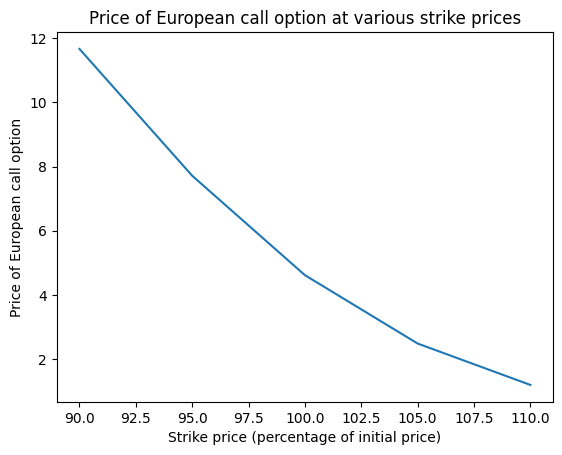

In [ ]:
import matplotlib.pyplot as plt
plt.plot(strikes, call_prices)
plt.xlabel("Strike price (percentage of initial price)")
plt.ylabel("Price of European call option")
plt.title("Price of European call option at various strike prices")

Text(0.5, 1.0, 'Price of American call option at various strike prices')

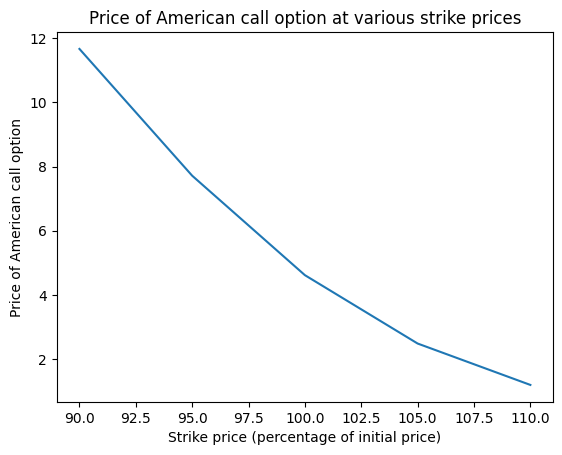

In [ ]:
strikes = (90, 95, 100, 105, 110)
amer_call_prices = []
for strike in strikes:
  tree = TrinomialCallAmerican(100, 0.05, 0.20, 0.25, strike)
  cprice = tree.price(180)
  amer_call_prices.append(cprice)
import matplotlib.pyplot as plt
plt.plot(strikes, amer_call_prices)
plt.xlabel("Strike price (percentage of initial price)")
plt.ylabel("Price of American call option")
plt.title("Price of American call option at various strike prices")

## Problem 22

In [ ]:
strikes = (90, 95, 100, 105, 110)
put_prices = []
for strike in strikes:
  tree = TrinomialPut(100, 0.05, 0.20, 0.25, strike)
  pprice = tree.price(180)
  put_prices.append(pprice)

Text(0.5, 1.0, 'Price of European put option at various strike prices')

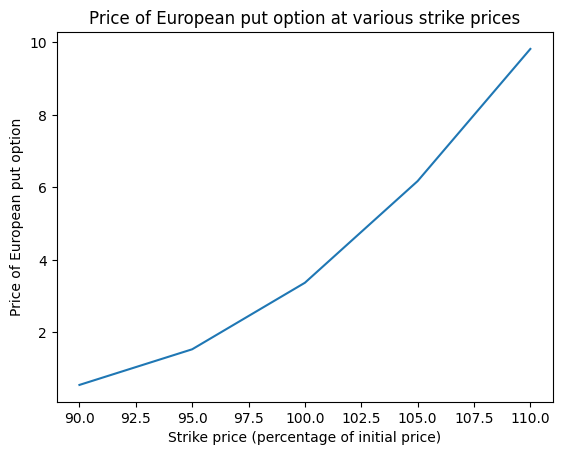

In [ ]:
import matplotlib.pyplot as plt
plt.plot(strikes, put_prices)
plt.xlabel("Strike price (percentage of initial price)")
plt.ylabel("Price of European put option")
plt.title("Price of European put option at various strike prices")

In [ ]:

strikes = (90, 95, 100, 105, 110)
amer_put_prices = []
for strike in strikes:
  tree = TrinomialPutAmerican(100, 0.05, 0.20, 0.25, strike)
  pprice = tree.price(180)
  amer_put_prices.append(pprice)

Text(0.5, 1.0, 'Price of American put option at various strike prices')

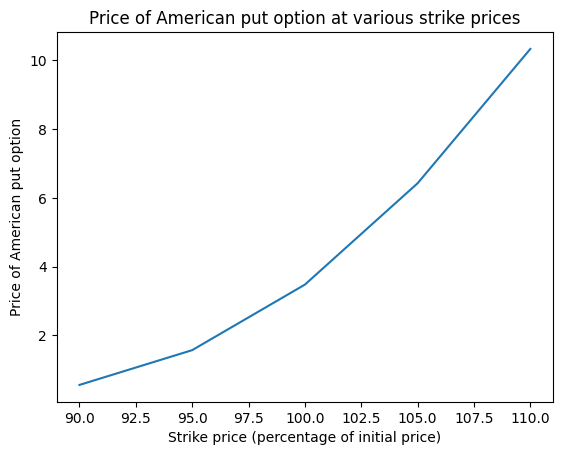

In [ ]:
import matplotlib.pyplot as plt
plt.plot(strikes, amer_put_prices)
plt.xlabel("Strike price (percentage of initial price)")
plt.ylabel("Price of American put option")
plt.title("Price of American put option at various strike prices")

## Problem 23

In [ ]:
bond_prices = [strike * np.exp(-0.25 * 0.05) for strike in strikes]

In [ ]:
print("Strike\tBond\tCall price\tPut price\tCall plus bond\tPut plus stock")
print("-----------------------------------------------------------------------")
for (i, strike) in enumerate(strikes):
  print (f"{strike}\t{bond_prices[i]:.2f}\t{call_prices[i]:.2f}\t\t{put_prices[i]:.2f}\t\t{call_prices[i] + bond_prices[i]:.2f}\t\t{put_prices[i] + 100:.2f}")

Strike	Bond	Call price	Put price	Call plus bond	Put plus stock
-----------------------------------------------------------------------
90	88.88	11.67		0.55		100.55		100.55
95	93.82	7.71		1.53		101.53		101.53
100	98.76	4.61		3.37		103.37		103.37
105	103.70	2.48		6.18		106.18		106.18
110	108.63	1.19		9.82		109.82		109.82


Based on this calculation, we can see that put-call parity holds.  This is the case because European call and put options cannot be exercised early; hence we can perform an arbitrage trade if call plus bond is different from put plus stock; we either buy the call and bond and sell the put and stock, or buy the put and stock and sell the call and bond, and get a risk-free profit.

## Problem 24

In [ ]:
print("Strike\tBond\tCall price\tPut price\tCall plus bond\tPut plus stock")
print("-----------------------------------------------------------------------")
for (i, strike) in enumerate(strikes):
  print (f"{strike}\t{bond_prices[i]:.2f}\t{amer_call_prices[i]:.2f}\t\t{amer_put_prices[i]:.2f}\t\t{amer_call_prices[i] + bond_prices[i]:.2f}\t\t{amer_put_prices[i] + 100:.2f}")

Strike	Bond	Call price	Put price	Call plus bond	Put plus stock
-----------------------------------------------------------------------
90	88.88	11.67		0.56		100.55		100.56
95	93.82	7.71		1.57		101.53		101.57
100	98.76	4.61		3.48		103.37		103.48
105	103.70	2.48		6.42		106.18		106.42
110	108.63	1.19		10.33		109.82		110.33


Put call parity does not hold for American options.  It is close for the strike prices we used here but not the same.  The reason the put plus the stock is worth more than the call plus the bond is that the put can be exercised early with advantage; if we try to perform a no-arbitrage argument, we can only get two inequalities on the difference between the call and put price.  The difference is greatest for the 110 strike price because it is most likely to be in the money to the extent that early exercise is advantageous.

Here is a table describing the delta hedging process for the path **udu**

| | t=0 | t=1 | t=2 | t = 3 |
| --- | ---: | ---: | ---: | ---: |
|Underlying |\$180.00|\$199.34|\$180.00|\$199.34|
|Put option |\$13.82|\$5.02|\$9.88|\$0.00|
|Delta hedge |-0.47|-0.24|-0.53||
|Stock portfolio value |\$-85.07|\$-39.16|$\-90.73|
|Change in cash account (trades) |\$85.07|\$-45.91|\$51.57|\$-105.41|
|Interest on cash account | |\$0.28|\$0.13|\$0.30|
|Total in cash account (including interest at risk free rate) |\$85.07|\$39.44|\$91.15|-\$13.96|

Initially we sell a put option for $13.82 and receive a premium.
As a delta hedge, we sell 0.47 shares of stock (short sale), yielding 85.07 cash.  When the stock goes up to \$199.34 at t=1, we buy back 0.23 shares of stock for \$45.91.  When the stock goes back down to \$180.00 at t=2, we sell 0.29 shares of stock yielding \$51.57 cash.  When the stock goes back up again to \$199.34, we are at option expiry.  The put option expires worthless.  We unwind our short sale by buying back the 0.53 shares of stock at \$199.34 per share for a total cost of \$105.41; this gives us a total of -\$13.96 in our cash account.

If we invest the \$13.82 premium at the risk-free rate of 2%, we would have \$13.96 after 6 months; hence we break even.



## Problem 25

In [ ]:
pp, ppo, sp, deltas = put_option_delta(180, 182, 0.50, 0.02, 0.25, 3)

In [ ]:
print(f"The price of a European put option with S=180, r=2%, sigma=25%, T=6 months, K=180 is {pp:.2f}")

The price of a European put option with S=180, r=2%, sigma=25%, T=6 months, K=180 is 13.82


In [ ]:
sp.round(decimals=2)

array([[180.  ,   0.  ,   0.  ,   0.  ],
       [162.54, 199.34,   0.  ,   0.  ],
       [146.77, 180.  , 220.76,   0.  ],
       [132.52, 162.54, 199.34, 244.48]])

In [ ]:
deltas.round(decimals=4)

array([[-0.4726,  0.    ,  0.    ],
       [-0.7447, -0.2423,  0.    ],
       [-1.    , -0.5288,  0.    ]])

In [ ]:
ppo.round(decimals=2)

array([[13.82,  0.  ,  0.  ,  0.  ],
       [22.41,  5.01,  0.  ,  0.  ],
       [34.63,  9.88,  0.  ,  0.  ],
       [49.48, 19.46,  0.  ,  0.  ]])

To price a European put option with the given characteristics using a 3-step Binomial tree, we note that we are using time steps of 2 months each, or 1/6 of a year.  

To obtain the appropriate volatility, we have the up factor of $e^{\sigma \sqrt{dt}}$, and a down factor of the reciprocal $e^{\sigma \sqrt{dt}}$, which work out to 1.107 and 0.902 respectively.  Hence an up step followed by a down step puts us back where we started.

We can therefore make a tree of all possible stock prices; after one step, it can go up to 199.34 or down to 162.53; after two steps it can be at 146.76, 180, or 220.76, after three steps it can be at 132.52, 162.54, 199.34, or 244.48, depending on whether we had 0, 1, 2, or 3 up steps.

Since the strike prices is 182, the final payoffs are  49.48, 19.46, 0, and 0.

To work out the value of the option we need to compute the up and down probabilities.  In order for the stock to be fairly priced, the risk-neutral up probability is ${e^{r dt} - d} \over {u - d}$, where $u$ and $d$ are the down factors.  A risk neutral valuation means buying a bond should have the same expected return as the stock, which means that the bond return is between the up factor and the down factor, and we can interpolate between the two to find what probability of going up is risk neutral. 

We can compute that the probability is 0.49 of going up and 0.51 of going down.

So we can work backward; after two down steps, we can go to 49.47 or 19.46; taking the appropriate weighted average and discounting we get that the value is 34.46; similarly after one up step and one down step, we can go to 19.46 or 0 as the payoff and we can compute that the value of the put option at that stage should be should be 9.88. The other two possibilities after two steps still have a payoff of 0 because the put option will be OTM no matter what happens.

After one time step, we can be at an up step or a down step; after the up step we can go up again, in which case the payoff is 0, or down in which case the discounted expected payoff is 9.88;  hence the value at this point should be 5.01.  If we were instead at a down step we could go up or down to expected payoffs of 34.63 or 9.88, which gives a value of 22.41 at this point.

Which means that the value at the initial step should be **13.82**





## Problem 26

In [ ]:
(app, ap_payoff, ast, ap_delta) = american_option(180,182,0.50,0.02, 0.25, 25, "P")

In [ ]:
print (f"The price of an American put option is {app:.2f}")

The price of an American put option is 13.04


In [ ]:
ap_delta.round(decimals=2)

array([[-0.48,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.56, -0.4 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.65, -0.48, -0.32,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.73, -0.57, -0.39, -0.24,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.81, -0.66, -0.48, -0.31, -0.18,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],


In [ ]:
ast.round(decimals=2)

array([[180.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [173.75, 186.48,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [167.71, 180.  , 193.19,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [161.89, 173.75, 186.48, 200.14,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ],
       [156.26, 167.71, 180.  , 193.

In [ ]:
ap_payoff.round(decimals=2)

array([[1.3040e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6050e+01, 9.9900e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9480e+01, 1.2590e+01, 7.3800e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
      

In [ ]:
#flips = np.random.randint(0, 2, size=25)
#path = ''.join('u' if bit == 1 else 'd' for bit in flips)
path = "dddddduududuuuduudduududd"
flips = [1 if x == 'u' else 0 for x in path]

In [ ]:
path

'dddddduududuuuduudduududd'

In [ ]:
ps = np.concatenate(([0], np.cumsum(flips)))

In [ ]:
delta_path = []
stock_path = []
option_path = []
for i in range(0, 26):
    the_delta = ap_delta[i][ps[i]] if i < 25 else 0.0
    the_price = ast[i][ps[i]]
    delta_path.append(the_delta)
    stock_path.append(the_price)
    option_path.append(ap_payoff[i][ps[i]])
    if (the_price + ap_payoff[i][ps[i]] <= 182.005):
       print(f"Exercise occurs at t={i}")

Exercise occurs at t=24
Exercise occurs at t=25


In [ ]:
ult = 0
bal = 0
balances = []
stock_trades = []
inters = []
for i in range(0, 26):
  the_delta = delta_path[i]
  the_change = the_delta - ult
  the_trade = (stock_path[i] if i < 25 else 182) * the_change
  inter = (np.exp(0.02 * 0.02) - 1) * bal
  ult = the_delta
  bal += inter - the_trade
  stock_trades.append(-the_trade)
  balances.append(bal)
  inters.append(inter)

In [ ]:
print (f"The path chosen is: {path}")

The path chosen is: dddddduududuuuduudduududd


In [ ]:
print("Time\tDelta\tStock\tOption\tTrade Amount\tInterest Cash balance")
print("---------------------------------------------------------------")
for i in range(25):
    print(f"{i}\t{delta_path[i]:5.2}\t{stock_path[i]:.2f}\t{option_path[i]:6.2f}\t{stock_trades[i]:8.2f}\t{inters[i]:.2f}\t{balances[i]:.2f}")

print(f"At time t=24, the option is exercised early, so we pay out $182 to buy back our shares")

Time	Delta	Stock	Option	Trade Amount	Interest Cash balance
---------------------------------------------------------------
0	-0.48	180.00	 13.04	   85.60	0.00	85.60
1	-0.56	173.75	 16.05	   14.81	0.03	100.45
2	-0.65	167.71	 19.48	   14.60	0.04	115.09
3	-0.73	161.89	 23.30	   13.79	0.05	128.92
4	-0.81	156.26	 27.48	   12.39	0.05	141.37
5	-0.88	150.83	 31.96	   10.54	0.06	151.97
6	-0.94	145.59	 36.64	    8.41	0.06	160.44
7	 -0.9	150.83	 31.79	   -6.31	0.06	154.19
8	-0.84	156.26	 26.98	   -8.43	0.06	145.83
9	-0.91	150.83	 31.63	   10.62	0.06	156.51
10	-0.86	156.26	 26.73	   -8.16	0.06	148.40
11	-0.93	150.83	 31.47	   10.42	0.06	158.88
12	-0.88	156.26	 26.49	   -7.48	0.06	151.46
13	-0.82	161.89	 21.58	  -10.39	0.06	141.13
14	-0.74	167.71	 16.87	  -13.82	0.06	127.37
15	-0.85	161.89	 21.22	   17.54	0.05	144.97
16	-0.76	167.71	 16.36	  -13.68	0.06	131.35
17	-0.66	173.75	 11.81	  -18.68	0.05	112.72
18	 -0.8	167.71	 15.82	   23.69	0.05	136.45
19	-0.91	161.89	 20.53	   18.99	0.05	155.49
20	-0.85

The table shows the delta hedging needed at each stage.  
At time t=24, the option is exercised early, so we pay out $182 to buy back our shares.  This leaves us with a cash balance of -13.16.

Our initial premium is **13.04** from sale of the put option; which if we invest at the risk-free rate of 2% for 6 months will grow to **13.16**.  Hence we break even.

Time|Delta|Stock Price|Option Price| Interest| Cash Balance
----|-----|-----------|------------|---------|--------------
0|-0.48|180.00| 13.04|   85.60|0.00|85.60
1|-0.56|173.75| 16.05|   14.81|0.03|100.45
2|-0.65|167.71| 19.48|   14.60|0.04|115.09
3|-0.73|161.89| 23.30|   13.79|0.05|128.92
4|-0.81|156.26| 27.48|   12.39|0.05|141.37
5|-0.88|150.83| 31.96|   10.54|0.06|151.97
6|-0.94|145.59| 36.64|    8.41|0.06|160.44
7| -0.9|150.83| 31.79|   -6.31|0.06|154.19
8|-0.84|156.26| 26.98|   -8.43|0.06|145.83
9|-0.91|150.83| 31.63|   10.62|0.06|156.51
10|-0.86|156.26| 26.73|   -8.16|0.06|148.40
11|-0.93|150.83| 31.47|   10.42|0.06|158.88
12|-0.88|156.26| 26.49|   -7.48|0.06|151.46
13|-0.82|161.89| 21.58|  -10.39|0.06|141.13
14|-0.74|167.71| 16.87|  -13.82|0.06|127.37
15|-0.85|161.89| 21.22|   17.54|0.05|144.97
16|-0.76|167.71| 16.36|  -13.68|0.06|131.35
17|-0.66|173.75| 11.81|  -18.68|0.05|112.72
18| -0.8|167.71| 15.82|   23.69|0.05|136.45
19|-0.91|161.89| 20.53|   18.99|0.05|155.49
20|-0.85|167.71| 15.26|  -11.66|0.06|143.90
21|-0.73|173.75| 10.22|  -19.32|0.06|124.63
22|-0.92|167.71| 14.71|   30.51|0.05|155.20
23|-0.82|173.75|  9.25|  -15.83|0.06|139.43
24| -1.0|167.71| 14.29|   29.36|0.06|168.84


The goal of delta-hedging is to create a portfolio of the underlying asset and the option that has a delta of zero or as close to zero as possible. This helps to neutralize the risk of changes in the underlying asset price.

In the delta-hedging process, adjustments are made to the portfolio based on changes in the underlying asset price. When the underlying asset price increases, the portfolio's delta decreases, requiring the trader to sell some of the underlying asset to maintain a delta-neutral position. (The delta for a put options is between 0 and -1, so we are always short shares). Conversely, when the underlying asset price decreases, the portfolio's delta increases, necessitating the purchase of more underlying asset.

American options can be exercised at any time, including before expiration, if it is advantageous for the option holder. This means that delta-hedging for American options requires the trader to account for the possibility of early exercise and adjust the hedging portfolio accordingly. Delta-hedging for American options is more complex than for European options due to the additional consideration of early exercise.  The delta hedging is costlier; we need to maintain a replication portfolio at all times based on how the option will react to changes in the stock price at each time step, which needs to account for early exercise.  

## Problem 27

In [ ]:
print(f"Path: {path}")

Path: dddddduududuuuduudduududd


In [ ]:
print ([round(x, 2) for x in stock_path])

[180.0, 173.75, 167.71, 161.89, 156.26, 150.83, 145.59, 150.83, 156.26, 150.83, 156.26, 150.83, 156.26, 161.89, 167.71, 161.89, 167.71, 173.75, 167.71, 161.89, 167.71, 173.75, 167.71, 173.75, 167.71, 161.89]


In [ ]:
print(f"For the path given above, the average price is: {np.mean(stock_path):.2f}")

For the path given above, the average price is: 162.78


In [ ]:
print(f"For the path given above, the payoff for the Asian option is: {180 - np.mean(stock_path):.2f}")

For the path given above, the payoff for the Asian option is: 17.22


In [ ]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    S = np.zeros([M, N + 1])  # underlying price
    S[:, 0] = S_ini

    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]

        Asian[j] = np.exp(-r * T) * max(K - (Total / (N + 1)), 0)

    return S, Asian

In [ ]:
S, Asian = asian_option_mc(180, 180, 0.50, 0.02, 0.25, 25, 10**6)

In [ ]:
print (f"The price of the Asian option using the Monte Carlo method is: {np.mean(Asian):.2f}")

The price of the Asian option using the Monte Carlo method is: 6.80


In [ ]:
import math

N = 25
prices = [0.0] * (1 << N)

mp = [[] for _ in range(N+1)]
for i in range(N+1):
    mp[i] = [0.0] * (1 << i)

dt = 0.50 / N
u = math.exp(0.25 * math.sqrt(dt))
d = math.exp(-0.25 * math.sqrt(dt))
p = (math.exp(0.02 * dt) - d) / (u - d)
res = 0.0

for i in range(1 << N):
    price = 180.0
    tot = 180.0
    up_cnt = 0
    for j in range(N):
        if i & (1 << (N - j - 1)):
            price *= u
            up_cnt += 1
        else:
            price *= d
        tot += price
    prob = math.pow(p, up_cnt) * math.pow(1 - p, N - up_cnt)
    prices[i] = max(180 - (tot / (N + 1)), 0.0)

    prob2 = 1.0
    for j in range(N+1):
        mp[N-j][i >> j] += prices[i] * prob2 * math.exp(-0.02 * 0.50 * (j / N))
        if i & (1 << j):
            prob2 *= p
        else:
            prob2 *= (1 - p)
    res += prices[i] * prob

print(mp[0][0])
print(res * math.exp(-0.02 * 0.50))


6.808952535960736
6.808952535863569


In [ ]:

path = "dddddduududuuuduudduududd"
st = 180.0
old_delta = 0.0
bal = 0.0
mask = 0

for i in range(N):
    st_up = st * u
    st_down = st * d
    opt_u = mp[i+1][2*mask+1]
    opt_d = mp[i+1][2*mask]
    delta = (opt_u - opt_d) / (st_up - st_down)
    interest = bal * (math.exp(0.02 * 0.5/N) - 1)
    new_bal = bal + interest - (delta - old_delta) * st

    print(f"{i}|{st}|{mp[i][mask]}|{delta:.5f}|{-(delta - old_delta) * st}|{interest}|{new_bal}")

    if path[i] == 'u':
        mask = mask * 2 + 1
        st *= u
    else:
        mask = mask * 2
        st *= d

    bal = new_bal
    old_delta = delta

print(st, "|", prices[mask], "|")

I computed the price of an Asian option using a Binomial tree (brute-forcing all possible paths) and also obtained a result of 6.80

time step | stock price | option price | delta | change (trade) | interest | cash balance 
-- |-- | -- | --- | --- | --- | ---
0|180.00|6.81|-0.44396|79.91|0.00|79.91
1|173.75|9.62|-0.55905|20.00|0.03|99.94
2|167.71|13.04|-0.65980|16.90|0.04|116.88
3|161.89|16.93|-0.72949|11.28|0.05|128.21
4|156.26|21.09|-0.75949|4.69|0.05|132.95
5|150.83|25.26|-0.75393|-0.84|0.05|132.16
6|145.59|29.27|-0.72624|-4.03|0.05|128.18
7|150.83|25.52|-0.68638|-6.01|0.05|122.22
8|156.26|21.85|-0.64510|-6.45|0.05|115.82
9|150.83|25.40|-0.61301|-4.84|0.05|111.02
10|156.26|22.12|-0.57427|-6.05|0.04|105.02
11|150.83|25.28|-0.53706|-5.61|0.04|99.45
12|156.26|22.41|-0.49880|-5.98|0.04|93.51
13|161.89|19.64|-0.46052|-6.20|0.04|87.35
14|167.71|16.99|-0.42223|-6.42|0.03|80.96
15|161.89|19.49|-0.38392|-6.20|0.03|74.79
16|167.71|17.29|-0.34560|-6.43|0.03|68.39
17|173.75|15.23|-0.30726|-6.66|0.03|61.76
18|167.71|17.11|-0.26891|-6.43|0.02|55.35
19|161.89|18.70|-0.23054|-6.21|0.02|49.16
20|167.71|17.38|-0.19215|-6.44|0.02|42.75
21|173.75|16.24|-0.15375|-6.67|0.02|36.09
22|167.71|17.19|-0.11534|-6.44|0.01|29.66
23|173.75|16.51|-0.07691|-6.68|0.01|23.00
24|167.71|16.98|-0.03846|-6.45|0.01|16.56
25|161.89|17.22|0|-6.23|0.01|10.33 - 17.22 = -6.88

At time t=25, we close out our short position.  We need to pay out $17.22 to the option holder.  Our initial premium was 6.81, so we break even after accounting for the interest on the initial premium.
